In [ ]:
!pip install -q -U transformers==4.37.2
!pip install -q bitsandbytes==0.41.3 accelerate==0.25.0
!pip install -q git+https://github.com/openai/whisper.git
!pip install -q gradio
!pip install -q gTTS



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 59.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 29.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.6/314.6 kB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━

In [ ]:
import torch
from transformers import BitsAndBytesConfig, pipeline

In [ ]:
quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16
)

In [ ]:
model_id = "llava-hf/llava-1.5-7b-hf"

In [ ]:
pipe = pipeline("image-to-text",
                model=model_id,
                model_kwargs={"quantization_config": quantization_config})

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/70.1k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.18G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.33k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/438 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


preprocessor_config.json:   0%|          | 0.00/557 [00:00<?, ?B/s]

In [ ]:
import whisper
import gradio as gr
import time
import warnings
import os
from gtts import gTTS

In [ ]:

from PIL import Image

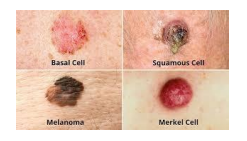

In [ ]:
image_path = "/content/Screenshot 2024-02-26 104003.png"
image = Image.open((image_path))
image

In [ ]:

import nltk
nltk.download('punkt')
from nltk import sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:

import locale
print(locale.getlocale())  # Before running the pipeline
# Run the pipeline
print(locale.getlocale())  # After running the pipeline

('en_US', 'UTF-8')
('en_US', 'UTF-8')


In [ ]:
max_new_tokens = 200

prompt_instructions = """
Describe the image using as much detail as possible,
is it a painting, a photograph, what colors are predominant,
what is the image about?
"""

prompt = "USER: <image>\n"+ prompt_instructions +"\n Assistant:"

In [ ]:
outputs=pipe(image,prompt=prompt, generate_kwargs={"max_new_tokens": max_new_tokens})

In [ ]:
outputs

[{'generated_text': 'USER:  \n\nDescribe the image using as much detail as possible,\nis it a painting, a photograph, what colors are predominant,\nwhat is the image about?\n\n Assistant: The image is a close-up of a person\'s skin, showing various skin conditions. There are four distinct skin conditions displayed, each with a different color and appearance. The skin conditions are accompanied by descriptions, such as "basal cell," "squamous cell," "melanoma," and "merkel cell." The close-up view of the skin allows for a detailed examination of these conditions.'}]

In [ ]:
for sent in sent_tokenize(outputs[0]["generated_text"]):
    print(sent)

USER:  

Describe the image using as much detail as possible,
is it a painting, a photograph, what colors are predominant,
what is the image about?
Assistant: The image is a close-up of a person's skin, showing various skin conditions.
There are four distinct skin conditions displayed, each with a different color and appearance.
The skin conditions are accompanied by descriptions, such as "basal cell," "squamous cell," "melanoma," and "merkel cell."
The close-up view of the skin allows for a detailed examination of these conditions.


In [ ]:
import warnings
from gtts import gTTS
import numpy as np

In [ ]:
torch.cuda.is_available()
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using torch {torch.__version__} ({DEVICE})")

Using torch 2.2.1+cu121 (cuda)


In [ ]:


import whisper
model = whisper.load_model("medium", device=DEVICE)
print(
    f"Model is {'multilingual' if model.is_multilingual else 'English-only'} "
    f"and has {sum(np.prod(p.shape) for p in model.parameters()):,} parameters."
)

100%|█████████████████████████████████████| 1.42G/1.42G [00:22<00:00, 68.3MiB/s]


Model is multilingual and has 762,321,920 parameters.


In [ ]:
 import re

In [ ]:
input_text = 'What color is the image'
input_image = '/content/Screenshot 2024-02-26 104003.png'

In [ ]:
# load the image
image = Image.open(input_image)

# prompt_instructions = """
# Describe the image using as much detail as possible, is it a painting, a photograph, what colors are predominant, what is the image about?
# """

# print(input_text)
prompt_instructions = """
Act as an expert in imagery descriptive analysis, using as much detail as possible from the image, respond to the following prompt:
""" + input_text
prompt = "USER: <image>\n" + prompt_instructions + "\nASSISTANT:"

# print(prompt)

outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})

match = re.search(r'ASSISTANT:\s*(.*)', outputs[0]["generated_text"])

if match:
    # Extract the text after "ASSISTANT:"
    extracted_text = match.group(1)
    print(extracted_text)
else:
    print("No match found.")

for sent in sent_tokenize(outputs[0]["generated_text"]):
    print(sent)

The image is in black and white.
USER:  

Act as an expert in imagery descriptive analysis, using as much detail as possible from the image, respond to the following prompt:
What color is the image
ASSISTANT: The image is in black and white.


In [ ]:
import datetime
import os

In [ ]:
## Logger file
tstamp = datetime.datetime.now()
tstamp = str(tstamp).replace(' ','_')
logfile = f'{tstamp}_log.txt'
def writehistory(text):
    with open(logfile, 'a', encoding='utf-8') as f:
        f.write(text)
        f.write('\n')
    f.close()

In [ ]:
import re
import requests
from PIL import Image

def img2txt(input_text, input_image):

    # load the image
    image = Image.open(input_image)

    writehistory(f"Input text: {input_text} - Type: {type(input_text)} - Dir: {dir(input_text)}")
    if type(input_text) == tuple:
        prompt_instructions = """
        Describe the image using as much detail as possible, is it a painting, a photograph, what colors are predominant, what is the image about?
        """
    else:
        prompt_instructions = """
        Act as an expert in imagery descriptive analysis, using as much detail as possible from the image, respond to the following prompt:
        """ + input_text

    writehistory(f"prompt_instructions: {prompt_instructions}")
    prompt = "USER: <image>\n" + prompt_instructions + "\nASSISTANT:"

    outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})

    # Properly extract the response text
    if outputs is not None and len(outputs[0]["generated_text"]) > 0:
        match = re.search(r'ASSISTANT:\s*(.*)', outputs[0]["generated_text"])
        if match:
            # Extract the text after "ASSISTANT:"
            reply = match.group(1)
        else:
            reply = "No response found."
    else:
        reply = "No response generated."

    return reply

In [ ]:
# !pip install transformers torch torchvision

# from PIL import Image
# from transformers import BlipProcessor, BlipForConditionalGeneration
# import torch

# # Instantiate the model
# image_model_id = "Salesforce/blip-image-captioning-base"
# image_model = BlipForConditionalGeneration.from_pretrained(image_model_id)
# processor = BlipProcessor.from_pretrained(image_model_id)



In [ ]:
# # Processing the image
# file_path = "/content/Screenshot 2024-02-26 104003.png"
# image = Image.open(file_path).convert('RGB')
# inputs = processor(image, return_tensors="pt")
# out = image_model.generate(**inputs, max_new_tokens=200)

# # Generate caption
# caption = processor.decode(out[0], skip_special_tokens=True)

# print(caption)

In [ ]:

# def imgtotxt(input_image):

#     image_model = BlipForConditionalGeneration.from_pretrained(image_model_id)
#     processor = BlipProcessor.from_pretrained(image_model_id)
#     image = Image.open(input_image).convert('RGB')
#     inputs = processor(image, return_tensors="pt")
#     out = image_model.generate(**inputs, max_new_tokens=200)

#     # Generate caption
#     caption = processor.decode(out[0], skip_special_tokens=True)

#     print(caption)
#     return caption


    # writehistory(f"Input text: {input_text} - Type: {type(input_text)} - Dir: {dir(input_text)}")
    # if type(input_text) == tuple:
    #     prompt_instructions = """
    #     Describe the image using as much detail as possible, is it a painting, a photograph, what colors are predominant, what is the image about?
    #     """
    # else:
    #     prompt_instructions = """
    #     Act as an expert in imagery descriptive analysis, using as much detail as possible from the image, respond to the following prompt:
    #     """ + input_text

    # writehistory(f"prompt_instructions: {prompt_instructions}")
    # prompt = "USER: <image>\n" + prompt_instructions + "\nASSISTANT:"

    # outputs = pipes(image, prompt=prompt, generate_kwargs={"max_new_tokens": max_new_tokens})

    # # Properly extract the response text
    # if outputs is not None and len(outputs[0]["generated_text"]) > 0:
    #     match = re.search(r'ASSISTANT:\s*(.*)', outputs[0]["generated_text"])
    #     if match:
    #         # Extract the text after "ASSISTANT:"
    #         reply = match.group(1)
    #     else:
    #         reply = "No response found."
    # else:
    #     reply = "No response generated."

    # return reply

In [ ]:
def transcribe(audio):

    # Check if the audio input is None or empty
    if audio is None or audio == '':
        return ('','',None)  # Return empty strings and None audio file

    # language = 'en'

    audio = whisper.load_audio(audio)
    audio = whisper.pad_or_trim(audio)

    mel = whisper.log_mel_spectrogram(audio).to(model.device)

    _, probs = model.detect_language(mel)

    options = whisper.DecodingOptions()
    result = whisper.decode(model, mel, options)
    result_text = result.text

    return result_text

In [ ]:
def text_to_speech(text, file_path):
    language = 'hi'

    audioobj = gTTS(text = text,
                    lang = language,
                    slow = False)

    audioobj.save(file_path)

    return file_path

In [ ]:
import locale
locale.getpreferredencoding=lambda:"UTF-8"

In [ ]:
!ffmpeg -f lavfi -i anullsrc=r=44100:cl=mono -t 10 -q:a 9 -acodec libmp3lame Temp.mp3

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
import gradio as gr
import base64
import os

# A function to handle audio and image inputs
def process_inputs(audio_path, image_path):
    # Process the audio file (assuming this is handled by a function called 'transcribe')
    speech_to_text_output = transcribe(audio_path)
    # blip
    # blip_output= imgtotxt(image_path)
    # Handle the image input
    if image_path:
        llava_output = img2txt(speech_to_text_output, image_path)
    else:
        llava_output = "No image provided."

    # Assuming 'transcribe' also returns the path to a processed audio file
    processed_audio_path = text_to_speech(llava_output, "Temp3.mp3")  # Replace with actual path if different

    return speech_to_text_output,  llava_output, processed_audio_path

# Create the interface
iface = gr.Interface(
    fn=process_inputs,
    inputs=[
        gr.Audio(sources=["microphone"], type="filepath"),
        gr.Image(type="filepath")
    ],
    outputs=[
        gr.Textbox(label="Speech to Text"),
        # gr.Textbox(label="blip Output"),
        gr.Textbox(label="llava Output"),
        gr.Audio("Temp.mp3")
    ],
    title="Learn OpenAI Whisper: Image processing with Whisper and Llava",
    description="Upload an image and interact via voice input and audio response."
)

# Launch the interface
iface.launch(debug=True, share=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://fef3ad16345fa3260a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1123: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
